# **Latar Belakang**

Transjakarta adalah sistem Bus Rapid Transit (BRT) pertama di Asia Tenggara dan Selatan yang beroperasi sejak 2004 di Jakarta, Indonesia. Transjakarta dirancang sebagai transportasi massal untuk mendukung aktivitas ibukota yang padat. Dengan jalur terpanjang di dunia (251,2 km) dan 260 halte di 13 koridor, Transjakarta yang awalnya beroperasi dari pukul 05.00 - 22.00 WIB, kini beroperasi 24 jam. Dengan rute yang semakin luas dan kemudahan penggunaan, Transjakarta menjadi transportasi favorit warga Jakarta. Namun, ada beberapa masalah yang harus ditangani, seperti kekerasan seksual terhadap perempuan, penumpukan penumpang di halte, kepadatan penumpang di dalam bus, dan pencopetan.

# **Pernyataan Masalah**
Transjakarta ingin mengevaluasi transaksi selama satu bulan pada April 2023 untuk meningkatkan layanan kepada penumpang.

# **Profil Data**

Data ini adalah data penumpang untuk bulan April 2023. Data ini terdiri dari 37.900 baris dan 22 kolom. Kolomnya sebagai berikut:

1.	transID: Unique transaction id for every transaction
2.	payCardID: Customers main identifier. The card customers use as a ticket for entrance and exit.
3.	payCardBank: Customers card bank issuer name
4.	payCardName: Customers name that is embedded in the card.
5.	payCardSex: Customers sex that is embedded in the card
6.	payCardBirthDate: Customers birth year
7.	corridorID: Corridor ID / Route ID as key for route grouping.
8.	corridorName: Corridor Name / Route Name contains Start and Finish for each route.
9.	direction: 0 for Go, 1 for Back. Direction of the route.
10.	tapInStops: Tap In (entrance) Stops ID for identifying stops name
11.	tapInStopsName: Tap In (entrance) Stops Name where customers tap in.
12.	tapInStopsLat: Latitude of Tap In Stops
13.	tapInStopsLon: Longitude of Tap In Stops
14.	stopStartSeq: Sequence of the stops, 1st stop, 2nd stops etc. Related to direction.
15.	tapInTime: Time of tap in. Date and time
16.	tapOutStops: Tap Out (Exit) Stops ID for identifying stops name
17.	tapOutStopsName: Tap out (exit) Stops Name where customers tap out.
18.	tapOutStopsLat: Latitude of Tap Out Stops
19.	tapOutStopsLon: Longitude of Tap Out Stops
20.	stopEndSeq: Sequence of the stops, 1st stop, 2nd stops etc. Related to direction.
21.	tapOutTime: Time of tap out. Date and time
22.	payAmount: The number of what customers pay. Some are free. Some not.

In [9]:
import pandas as pd
import numpy as np
import missingno as msn
import seaborn as sns
import folium
from matplotlib import pyplot as plt

In [12]:
#Import dataset transjakarta.csv
df = pd.read_csv('C:\\Users\\mhdch\\Downloads\\Transjakarta.csv')
pd.set_option('display.max_columns', None)
df.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,Pal Putih,-6.184631,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,Kemenkes 2,-6.228700,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,Gg. Kunir II,-6.133132,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,Taman Elok 1,-6.195743,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,Sunter Boulevard Barat,-6.149650,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0


# **Data Understanding**

Sebelum menganalisis data lebih lanjut, ada langkah awal yang perlu dilakukan yaitu data understanding. Pada tahap ini, kita akan mengidentifikasi anomali yang ada dan cara mengatasinya saat proses cleaning data.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-null  object 
 16  tapOutStopsName   36556 non-null  object

In [14]:
df.describe()

,payCardID,payCardBirthDate,direction,tapInStopsLat,tapInStopsLon,stopStartSeq,tapOutStopsLat,tapOutStopsLon,stopEndSeq,payAmount
count,3.790000e+04,37900.000000,37900.000000,37900.000000,37900.000000,37900.000000,36556.000000,36556.000000,36556.000000,36893.000000
mean,4.250060e+17,1990.089314,0.500633,-6.214838,106.841554,13.572480,-6.214651,106.841233,21.219909,2699.712683
std,1.321699e+18,13.051482,0.500006,0.057911,0.060369,12.237623,0.059022,0.060999,13.800689,4212.225592
min,6.040368e+10,1946.000000,0.000000,-6.394973,106.614730,0.000000,-6.394973,106.614730,1.000000,0.000000
25%,1.800442e+14,1982.000000,0.000000,-6.245863,106.803470,4.000000,-6.247225,106.801750,11.000000,0.000000
50%,3.507947e+15,1990.000000,1.000000,-6.214587,106.834830,10.000000,-6.214718,106.834580,18.000000,3500.000000
75%,4.699023e+15,2001.000000,1.000000,-6.175528,106.882270,19.000000,-6.174736,106.883030,29.000000,3500.000000
max,4.997694e+18,2012.000000,1.000000,-6.089429,107.023950,68.000000,-6.091746,107.023660,77.000000,20000.000000


In [15]:
df.describe(include='object')

,transID,payCardBank,payCardName,payCardSex,corridorID,corridorName,tapInStops,tapInStopsName,tapInTime,tapOutStops,tapOutStopsName,tapOutTime
count,37900,37900,37900,37900,36643,35970,36687,37900,37900,35611,36556,36556
unique,37900,6,1993,2,221,216,2570,2602,37079,2230,2248,35908
top,FMZZ963S4B68ZP,dki,Suci Wacana,F,1T,Cibubur - Balai Kota,P00170,Penjaringan,2023-04-06 17:35:40,P00016,BKN,2023-04-24 06:53:50
freq,1,18743,80,20157,400,391,236,243,3,306,316,3


# **Unique Value**

In [16]:
pd.set_option('display.max_colwidth', None)
# data uni di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

transjakarta = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Value'],
                     data=listItem)
transjakarta

,Column Name,Number of Unique,Unique Value
0,transID,37900,"[EIIW227B8L34VB, LGXO740D2N47GZ, DJWR385V2U57TO, JTUZ800U7C86EH, VMLO535V7F95NJ, DDES630K2F80KC, HEMW326B9N91TV, XTKE052E5E87LN, OIHS248V7S72EB, ERXO372B2H63RB, CLWK627W2M22WO, IIEK980X1O23NZ, OPLW560U3S06UG, XESX233R4U46DN, LZFD368Q3E81HJ, KLUN542I2F21PI, XDMP644Z5Y29DB, CUPO258C0D42PY, SBPQ144H4S45RA, ZYRL615G4C05RD, MEFW094B7A84RS, ZJVI960B9I42DA, RJPK085I1K65HR, TFIO518N2X54UT, SYLN486U0E02TA, BECP746A8C28NV, KYNP204W3G29VA, MSFD430X8W13TO, MKND874X1D96HF, LFYJ535S2I30DP, TCKQ601Q5O01BC, KQIA358G2N38CX, RANO576G1J87EO, NZCE828E4J23AW, OFPJ170M5O75AP, LKXU174O1E59EP, AXTN077R7Z77JM, WQXL397G5U61OY, RLLZ887W3V14WZ, JJEK861K6E37KF, UANX737M9L25GI, VUWZ891M7I57EB, CXLW459Z3A28RD, AQPU510X2X44PT, BRUT293K1O98GA, MMEX885R3T18QL, UNFK619O2R74DX, FTGY161E2O14MG, ELVU605Z3W26IF, KPDA909R2T72GD, GIHF067H1Y81IV, IXJW013G5W79VX, PKAM574R5S22UG, IQBJ843C4G34DE, SRIX686S0S08SW, MLTY652D7F29HW, NICD824U6H93DE, YEOK544W1J67OX, OPNL705D9K64FN, KHKM512K0T88LD, RHUT145C1U25ZY, TWAK265Z0M88QR, JQIF022K9P74RM, MQCN972F9X71NY, KINJ335N6L86YT, TDIY341Y5S79UU, TFRA396G6W78PD, GXOP506G9B61EP, XESL868N6A66XN, IVHH403J9T51JH, OTGH855B8A29BP, YJMS457L2O20JF, NNAE999Q4V92XM, UCMI767D7M79GS, ZHFN555D9L05LU, WHTZ386I9S44YF, VHUC320U1S58CB, DBWI728C0M55ND, HHCJ093F0W41XK, JUNS207R4F95UA, LFIW578V8Y12XO, GYVC538M6B25WO, QRFR658M6P01AH, TKQW976R2D32RY, PCGM443G2W62OB, PEGV120E5W96OH, BUQT197K3D65PN, UNSO267V8F26WP, RHCN069U6G42WD, QMHC825R0K38KM, WGRY331M3O87VE, TKRV681O2S46RW, ELFD362R2U94NT, YYXK265F5N59SE, ZGJG301G9Z71AR, KNSE319Q1P35CC, RMJF585F2W51BQ, KFYK655N1H73XS, WTBE175B2A58NC, SVRH922T8G79FY, ...]"
1,payCardID,2000,"[180062659848800, 4885331907664776, 4996225095064169, 639099174703, 570928206772, 2251412124634980, 213155822653833, 3587341902618993, 6510013988638519, 3580401035990896, 5541851157087967, 347204308990092, 3536759468239783, 6575130739600630, 4056836188316, 4532407180860336, 4556326832434362836, 4969284110642, 502034641014, 5430018591726410, 378872365541693, 343851798729291, 676293109036, 213191293100137, 2295833910329055, 4968156435384914, 676367323901, 4384653483539395, 213155309116759, 4682220924642, 3589380857722689, 4394677357168120, 4905734029265594, 379334845079777, 346910704516122, 2247096843683316, 675990206087, 639040388584, 4947438345710982, 3539535695881465, 574726750023, 344303671677311, 3544931989278653, 4017802962833960, 5465310774429054, 347394043585982, 4723250872219869, 3545499820365948, 2718070346782735, 342531623551844, 349944373495091, 4428582927102421723, 566171543168, 213121690546749, 3527853482331808, 5542490449138301, 4380875529452127, 4172238784006231, 340065298083181, 4268640600849949, 4290559479079, 213155263532652, 4294484188649274, 180057903365395, 3551174827324245, 340858239719917, 3569562588766630, 180016859215889, 373945281501952, 5134532253940704, 3549158005951908, 379764016867073, 4189640459822695962, 4766007569419196, 3576239635494729, 587887634588, 567286069354, 4097122165824, 378851219912235, 180022972730457, 2237440645700724, 6011162006507240, 4730280883020443501, 3505707886664931, 4450403105752326, 4074114259011835374, 4000041838802, 4112330548313, 30583455954585, 3537543297101185, 2720484776954605, 3570422408611549, 2291402671071407, 676172975739, 180020791350481, 502072062834, 30385017224303, 6590854673757012, 4963710913075879668, 213104805015669, ...]"
2,payCardBank,6,"[emoney, dki, flazz, online, brizzi, bni]"
3,payCardName,1993,"[Bajragin Usada, Gandi Widodo, Emong Wastuti, Surya Wacana, Embuh Mardhiyah, Tirta Siregar, R. Devi Hariyah, S.T., Darmanto Rajasa, Cagak Maheswara, S.Sos, T. Dadap Pradana, M.Ak, Oskar Widiastuti, S.Farm, R.M. Labuh Laksmiwati, Shakila Maryadi, Danuja Usada, Nadine Utami, H. Lutfan Nurdiyanti, Sari Nababan, Hj. Ophelia Haryanti, S.Sos, Adikara Kurniawan, S.Sos, Karna Waskita, Aslijan Irawan, Garang Utama, Fathonah Saefullah, Darman Purwanti, Taufik Farida, Martana Suartini, Eluh Nugroho, Cut Hana Maulana, 

Berdasarkan paparan read data di atas, kita bisa melihat bahwa:

* beberapa kolom memiliki nilai yang hilang (NaN).
* pada kolom `tapInTime` dan `tapOutTime`, tipe data masih berupa objek, sehingga perlu diubah ke tipe datetime terlebih dahulu.

# **Duplicated Data**

In [17]:
df.duplicated().sum()

np.int64(0)

Tidak ada data duplicate

# **Missing Value**

In [18]:
df.isna().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID          1257
corridorName        1930
direction              0
tapInStops          1213
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         2289
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
dtype: int64

Kolom-kolom yang memiliki nilai yang hilang adalah `corridorID`, `corridorName`, `tapInStop`, `tapOutStops`,`tapOutStopsName`, `tapOutStopsLat`, `tapOutStopsLon`, `stopEndSeq`, `tapOutTime`, dan `payAmount`. Untuk menangani nilai yang hilang, kita bisa mengisinya atau menghapusnya jika tidak bisa diisi atau tidak digunakan untuk analisis.

<Axes: >

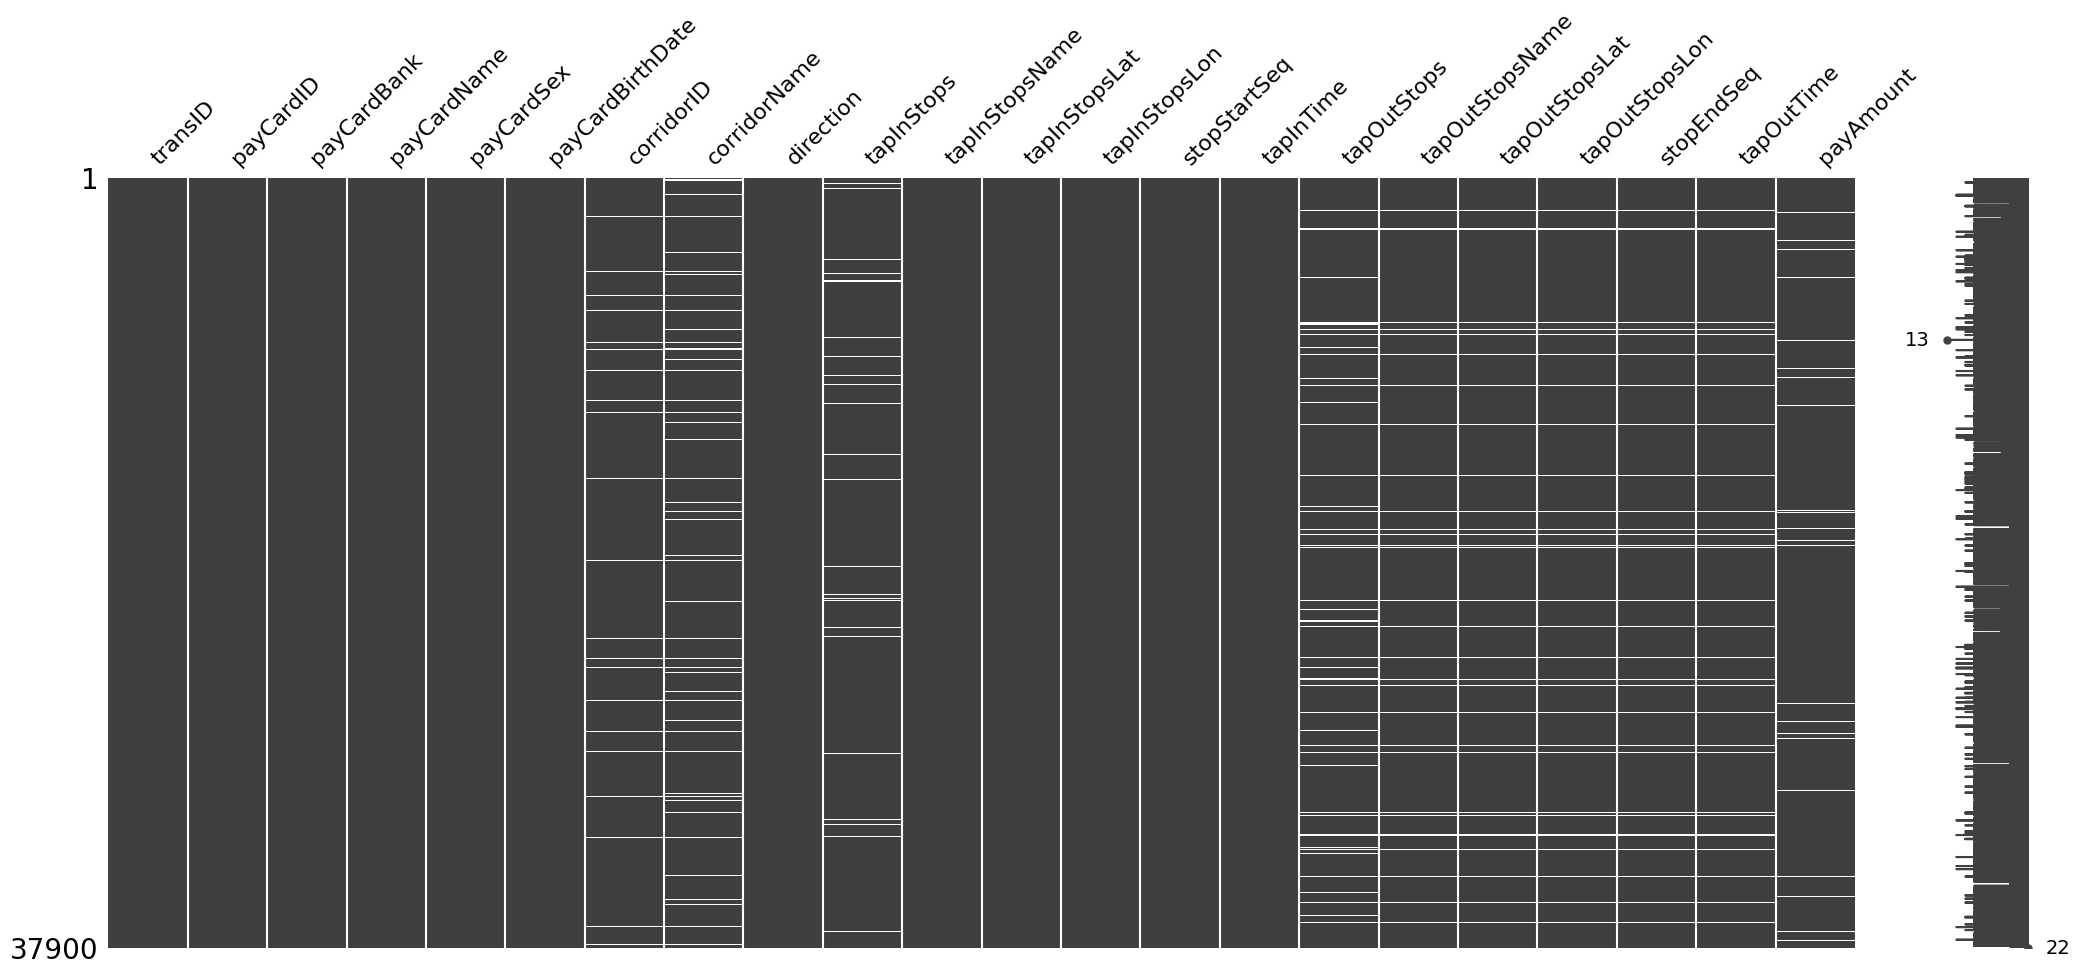

In [19]:
msn.matrix(df)

Di atas merupakan visualisasi matriks dari missing values. plot di atas memperlihatkan kolom-kolom mana saja yang memiliki nilai NaN dan seberapa besar proporsi nilainya yang hilang. dari plot di atas, kolom yang memiliki missing value nilai NaNnya saling berkaitan. seperti pada kolom `corridorID` dan `corridorName`, baris pada `corridorName` yang memiliki NaN, di baris `corridorID` juga memiliki NaN.

# **Data Cleaning**

**Corridor ID**

* Cara pertama adalah dengan mencocokkan `corridorName` dengan `corridorID`.

In [20]:
corr_ID = df.groupby('corridorName')['corridorID'].apply(lambda k: k.mode()[0]).reset_index()
corr_ID

,corridorName,corridorID
0,Andara - Stasiun Universitas Pancasila,JAK.44
1,BKN - Blok M,M7B
2,BSD - Jelambar,S11
3,BSD Serpong - Fatmawati,S12
4,Batusari - Grogol,8K
...,...,...
211,Terminal Rawamangun - Cipinang Muara,JAK.74
212,Terminal Tanah Merah - Pulo Gadung,JAK.112
213,Terminal Tanjung Priok - Ancol Barat,JAK.88
214,Tongtek - Tebet Eco Park (TEP) - Cililitan,JAK.43B


In [21]:
corrID_mapping = dict(zip(corr_ID['corridorName'], corr_ID['corridorID']))
corrID_mapping

{'Andara - Stasiun Universitas Pancasila': 'JAK.44',
 'BKN - Blok M': 'M7B',
 'BSD - Jelambar': 'S11',
 'BSD Serpong - Fatmawati': 'S12',
 'Batusari - Grogol': '8K',
 'Bekasi Barat - Blok M': 'B13',
 'Bekasi Barat - Kuningan': 'B14',
 'Bekasi Timur - Cawang': 'B21',
 'Bintara - Cipinang Indah': 'JAK.85',
 'Bintaro - Blok M': '8E',
 'Bintaro - Fatmawati': 'S31',
 'Blok M - Andara': 'JAK.31',
 'Blok M - Kota': '1',
 'Blok M - PGC': '7Q',
 'Blok M - Pasar Minggu': '6U',
 'Blok M - Universitas Indonesia': '9H',
 'Bulak Ringin - Kampung Rambutan': 'JAK.38',
 'Bulak Turi - Tanjung Priok': 'JAK.15',
 'Cawang UKI - Lubang Buaya': 'JAK.20',
 'Cempaka Putih - Pulo Gadung via Kelapa Gading': 'JAK.61',
 'Cibubur - BKN': '7C',
 'Cibubur - Balai Kota': '1T',
 'Cibubur - Kuningan': '6P',
 'Cibubur Junction - Blok M': '1K',
 'Cilangkap - Cililitan': 'JAK.36',
 'Ciledug - Tendean': '13',
 'Cililitan - Condet': 'JAK.16',
 'Cililitan - Condet via Kayu Manis': 'JAK.37',
 'Cililitan - Dwikora': 'JAK.21',
 

In [22]:
df['corridorID'] = df.apply(
    lambda row: corrID_mapping[row['corridorName']] 
    if pd.isnull(row['corridorID']) and pd.notnull(row['corridorName'])  
    else row['corridorID'],
    axis=1
)

* Langkah kedua adalah dengan mencocokkan `tapInStopsLat` dan `tapInStopsLon`.

In [23]:
corr_ID1 = df.groupby(['tapInStopsLat', 'tapInStopsLon'])['corridorID'].apply(lambda z: z.mode().iloc[0] if not z.mode().empty else None).reset_index()
corr_ID1

,tapInStopsLat,tapInStopsLon,corridorID
0,-6.394973,106.822770,D11
1,-6.387532,106.827380,D11
2,-6.387291,106.827300,D11
3,-6.384603,106.829200,D11
4,-6.382532,106.830010,D11
...,...,...,...
2598,-6.093637,106.750680,BW9
2599,-6.093258,106.743790,BW9
2600,-6.091992,106.745990,1A
2601,-6.091746,106.746100,BW9


In [24]:
corrID_mapping1 = dict(zip(zip(corr_ID1['tapInStopsLat'], corr_ID1['tapInStopsLon']), corr_ID1['corridorID']))
corrID_mapping1

{(-6.394973, 106.82277): 'D11',
 (-6.387532, 106.82738): 'D11',
 (-6.387291, 106.8273): 'D11',
 (-6.384603, 106.8292): 'D11',
 (-6.382532, 106.83001): 'D11',
 (-6.381864, 106.86551): 'D11',
 (-6.380018, 106.85409): 'D11',
 (-6.379677, 106.84152): 'D11',
 (-6.379631, 106.84094): 'D11',
 (-6.379606, 106.84312): 'D11',
 (-6.379436, 106.84923): 'D11',
 (-6.379273, 106.84919): 'D11',
 (-6.377369, 106.83281): 'D11',
 (-6.370321, 106.89628): '7C',
 (-6.369769, 106.89298): 'JAK.28',
 (-6.368735, 106.89366): '7C',
 (-6.36869, 106.88971): 'JAK.28',
 (-6.3675, 106.88923): 'JAK.73',
 (-6.365857, 106.88841): 'JAK.28',
 (-6.36178, 106.80714): 'JAK.46',
 (-6.360664, 106.87505): 'JAK.38',
 (-6.360526, 106.87535): 'JAK.38',
 (-6.360054, 106.88891): 'JAK.73',
 (-6.358625, 106.88184): 'JAK.28',
 (-6.358301, 106.87415): 'JAK.38',
 (-6.357133, 106.87444): 'JAK.38',
 (-6.356542, 106.88056): 'JAK.28',
 (-6.354871, 106.80112): 'JAK.47',
 (-6.354808, 106.87871): 'JAK.28',
 (-6.351941, 106.87255): 'JAK.38',
 (-

In [26]:
df['corridorID'] = df.apply(
    lambda row: corrID_mapping1[row['tapInStopsLat'], row['tapInStopsLon']] 
    if pd.isnull(row['corridorID']) and pd.notnull(row['tapInStopsLat']) and pd.notnull(row['tapInStopsLon'])  
    else row['corridorID'],
    axis=1
)

In [27]:
df['corridorID'].isna().sum()

np.int64(33)

**Corridor Name**

In [28]:
corrName = df.groupby('corridorID')['corridorName'].apply(lambda x: x.mode()[0]).reset_index()
corrName

,corridorID,corridorName
0,1,Blok M - Kota
1,10,Tanjung Priok - PGC 2
2,10A,Rusun Marunda - Tanjung Priok
3,10B,Rusun Cipinang Besar Selatan - Penas Kalimalang
4,10D,Kampung Rambutan - Tanjung Priok
...,...,...
216,S21,Ciputat - CSW
217,S22,Ciputat - Kampung Rambutan
218,S31,Bintaro - Fatmawati
219,T11,Poris Plawad - Bundaran Senayan


In [29]:
corrName_mapping = dict(zip(corrName['corridorID'], corrName['corridorName']))
corrName_mapping

{'1': 'Blok M - Kota',
 '10': 'Tanjung Priok - PGC 2',
 '10A': 'Rusun Marunda - Tanjung Priok',
 '10B': 'Rusun Cipinang Besar Selatan - Penas Kalimalang',
 '10D': 'Kampung Rambutan - Tanjung Priok',
 '10H': 'Tanjung Priok - Blok M',
 '10K': 'Tanjung Priok - Senen via Taman BMW',
 '11': 'Pulo Gebang - Matraman',
 '11B': 'Rusun Rawa Bebek - Penggilingan',
 '11C': 'Rusun Pinus Elok - Rusun Pulo Gebang',
 '11D': 'Pulo Gebang - Pulo Gadung 2 via PIK',
 '11K': 'Rusun Komarudin - Penggilingan',
 '11M': 'Rusun Rawa Bebek - Bukit Duri',
 '11N': 'Rusun Cipinang Muara - Jatinegara',
 '11P': 'Rusun Pondok Bambu - Walikota Jakarta Timur',
 '11Q': 'Kampung Melayu - Pulo Gebang via BKT',
 '12': 'Tanjung Priok - Pluit',
 '12A': 'Pelabuhan Kaliadem - Kota',
 '12B': 'Pluit - Senen',
 '12C': 'Rusun Waduk Pluit - Penjaringan',
 '12F': 'Rusun Marunda - Rusun Waduk Pluit',
 '12H': 'Rusun Penjaringan - Penjaringan',
 '12P': 'St. LRT Pegangsaan Dua - JIS',
 '13': 'Ciledug - Tendean',
 '13B': 'Puri Beta - Panc

In [30]:
df['corridorName'] = df.apply(
    lambda row: corrName_mapping[row['corridorID']] 
    if pd.isnull(row['corridorName']) and pd.notnull(row['corridorID'])  
    else row['corridorName'],
    axis=1
)

In [31]:
df['corridorName'].isna().sum()

np.int64(33)

Setelah kita filling data, nilai NaN yang tersisa untuk corridorName adalah 33.

**tapInStops.**

* Dengan metode yang sama, nilai NaN di kolom `tapInStops` dapat diisi dengan mencocokkannya dengan `tapInStopsName`.

In [32]:
TIS_ID = df.groupby('tapInStopsName')['tapInStops'].apply(lambda i: i.mode().iloc[0] if not i.mode().empty else None).reset_index()
TIS_ID

,tapInStopsName,tapInStops
0,18 Office Park,B00001P
1,ACC Simatupang,B00004P
2,ACE Hardware,B00005P
3,AKR Tower,B00018P
4,ASEAN,P00004
...,...,...
2597,Yayasan Nurul Ihsan Pulo Gebang,B05926P
2598,Yayasan Perguruan Rakyat 2,B05929P
2599,Yon Arhanud - 10 Pesanggrahan,B05933P
2600,Yos Sudarso Kodamar,P00274


In [33]:
TIS_mapping = dict(zip(TIS_ID['tapInStopsName'], TIS_ID['tapInStops']))
TIS_mapping

{'18 Office Park': 'B00001P',
 'ACC Simatupang': 'B00004P',
 'ACE Hardware': 'B00005P',
 'AKR Tower': 'B00018P',
 'ASEAN': 'P00004',
 'ASMI': 'P00005',
 'Adam Malik': 'P00001',
 'Adam Malik 1': 'B00008P',
 'Ahmad Yani Bea Cukai': 'P00002',
 'Akper Fatmawati Pondok Labu': 'B00017P',
 'Al Izhar Pondok Labu 2': 'B00027P',
 'Al Khairiyah School': 'B00028P',
 'Al Mukhlisin': 'B00030P',
 'Al Wathoniyah 1': 'B00031P',
 'Al Wathoniyah 2': 'B00032P',
 'Al-Wathoniyah': 'B06709P',
 'Allianz': 'B00034P',
 'Ambassador': 'B02183P',
 'Ampera 1': 'B00035P',
 'Ampera 2': 'B00036P',
 'Ampera 3': 'B00037P',
 'Ampera Garden': 'B00039P',
 'Ampera Yos Sudarso': 'B00040P',
 'Ananda Pulo Gadung': 'B00041P',
 'Ancol': 'P00003',
 'Ancol Pintu 2': 'B06000P',
 'Andara Margasatwa 2': 'B00043P',
 'Andara Margasatwa 3': 'B00044P',
 'Andara Margasatwa 4': 'B00045P',
 'Aneka Apotek': 'B00046P',
 'Aneka PIK Penggilingan': 'B00048P',
 'Antena III': 'B00052P',
 'Apartemen Kedoya Elok 2': 'B00056P',
 'Apartemen Simprug Te

In [34]:
df['tapInStops'] = df.apply(
    lambda row: TIS_mapping[row['tapInStopsName']] 
    if pd.isnull(row['tapInStops']) and pd.notnull(row['tapInStopsName'])  
    else row['tapInStops'],
    axis=1
)

* Mapping `tapInStopLat` dengan `tapInStopsLon`.

In [35]:
TIS_ID1 = df.groupby(['tapInStopsLat', 'tapInStopsLon'])['tapInStops'].apply(lambda s: s.mode().iloc[0] if not s.mode().empty else None).reset_index()
TIS_ID1

,tapInStopsLat,tapInStopsLon,tapInStops
0,-6.394973,106.822770,B00106P
1,-6.387532,106.827380,B00005P
2,-6.387291,106.827300,B00287P
3,-6.384603,106.829200,B00420P
4,-6.382532,106.830010,B02822P
...,...,...,...
2598,-6.093637,106.750680,B06040P
2599,-6.093258,106.743790,B06043P
2600,-6.091992,106.745990,B06042P
2601,-6.091746,106.746100,B06049P


In [36]:
TIS_mapping1 = dict(zip(zip(TIS_ID1['tapInStopsLat'], TIS_ID1['tapInStopsLon']), TIS_ID1['tapInStops']))
TIS_mapping1

{(-6.394973, 106.82277): 'B00106P',
 (-6.387532, 106.82738): 'B00005P',
 (-6.387291, 106.8273): 'B00287P',
 (-6.384603, 106.8292): 'B00420P',
 (-6.382532, 106.83001): 'B02822P',
 (-6.381864, 106.86551): 'B00805P',
 (-6.380018, 106.85409): 'B02055P',
 (-6.379677, 106.84152): 'B02473P',
 (-6.379631, 106.84094): 'B02472P',
 (-6.379606, 106.84312): 'B02823P',
 (-6.379436, 106.84923): 'B00551P',
 (-6.379273, 106.84919): 'B03563P',
 (-6.377369, 106.83281): 'B05521P',
 (-6.370321, 106.89628): 'B00226P',
 (-6.369769, 106.89298): 'B04538P',
 (-6.368735, 106.89366): 'B00248P',
 (-6.36869, 106.88971): 'B05651P',
 (-6.3675, 106.88923): 'B00662P',
 (-6.365857, 106.88841): 'B02060P',
 (-6.36178, 106.80714): 'B01048P',
 (-6.360664, 106.87505): 'B04114P',
 (-6.360526, 106.87535): 'B02512P',
 (-6.360054, 106.88891): 'B04583P',
 (-6.358625, 106.88184): 'B00487P',
 (-6.358301, 106.87415): 'B04092P',
 (-6.357133, 106.87444): 'B05379P',
 (-6.356542, 106.88056): 'B01352P',
 (-6.354871, 106.80112): 'B04331P'

In [38]:
df['tapInStops'] = df.apply(
    lambda row: TIS_mapping1[row['tapInStopsLat'], row['tapInStopsLon']] 
    if pd.isnull(row['tapInStops']) and pd.notnull(row['tapInStopsLat']) and pd.notnull(row['tapInStopsLon'])  
    else row['tapInStops'],
    axis=1
)
df['tapInStops'].isna().sum()

np.int64(34)

Setelah fill data dengan dua langkah di atas, masih terdapat 34 nilai NaN di kolom `tapInStops`.

**tapOutStops**

* Nilai NaN di kolom `tapOutStops` diisi dengan mencocokkannya dengan `tapOutStopsName`.

In [39]:
TOS_ID = df.groupby('tapOutStopsName')['tapOutStops'].apply(lambda o: o.mode().iloc[0] if not o.mode().empty else None).reset_index()
TOS_ID

,tapOutStopsName,tapOutStops
0,ABA,B00002P
1,ACC Simatupang,B00004P
2,ACE Hardware,B00005P
3,ASEAN,P00004
4,ASMI,P00005
...,...,...
2243,Yayasan Perguruan Rakyat 2,B05929P
2244,Yon Arhanud - 10 Pesanggrahan,B05933P
2245,Yos Sudarso Kodamar,P00274
2246,Yos Sudarso Kodamar 1,B05934P


In [40]:
TOS_mapping = dict(zip(TOS_ID['tapOutStopsName'], TOS_ID['tapOutStops']))
TOS_mapping

{'ABA': 'B00002P',
 'ACC Simatupang': 'B00004P',
 'ACE Hardware': 'B00005P',
 'ASEAN': 'P00004',
 'ASMI': 'P00005',
 'ASMI 2': 'B00070P',
 'ASSA': 'B06010P',
 'AURI Jatibaru': 'B00086P',
 'Acacia Residence': 'B00003P',
 'Adam Malik': 'P00001',
 'Ahmad Yani Bea Cukai': 'P00002',
 'Ahmad Yani Bea Cukai 1': 'B06534P',
 'Ahmad Yani Pisangan Baru': 'B00013P',
 'Akademi Farmasi Mahadhika': 'B00015P',
 'Akses Jembatan Ciliwung Balekambang': 'B00022P',
 'Al Khairiyah School': 'B00028P',
 'Al Mahbubiyah': 'B00029P',
 'Al Mukhlisin': 'B00030P',
 'Al-Wathoniyah': 'B06709P',
 'Allianz': 'B00034P',
 'Ambassador': 'B02183P',
 'Ampera 1': 'B00035P',
 'Ampera 2': 'B00036P',
 'Ampera 4': 'B00038P',
 'Ancol': 'P00003',
 'Andara Margasatwa 1': 'B00042P',
 'Antena II': 'B00053P',
 'Apartemen Simprug Teras': 'B00058P',
 'Apotik Rini Rawamangun': 'B00060P',
 'Arsip Nasional RI 1': 'B00066P',
 'Arsip Nasional RI 2': 'B00067P',
 'Asrama Marinir Marunda 2': 'B00074P',
 'Asshomadiyah Medicare Centre 2': 'B00077

In [42]:
df['tapOutStops'] = df.apply(
    lambda row: TOS_mapping[row['tapOutStopsName']] 
    if pd.isnull(row['tapOutStops']) and pd.notnull(row['tapOutStopsName'])  
    else row['tapOutStops'],
    axis=1
)
df['tapOutStops'].isna().sum()

np.int64(1363)

**payAmount**

In [43]:
df['payAmount'].unique()

array([ 3500., 20000.,     0.,    nan])

Dalam data, terdapat 3 nilai unik di kolom `payAmount`, yang menunjukkan ada 3 tarif berbeda untuk Transjakarta. Menurut [sumber](https://transjakarta.co.id/faq-transjakarta/), berikut distribusinya:

* 20,000 untuk Royaltrans
* 3,500 untuk Reguler
* 0 untuk Mikrotrans

* Mari kita mulai dengan Royaltrans. Berdasarkan informasi dari [web transjakarta](https://transjakarta.co.id/peta-rute/), bus dengan corridorID 1K, 1T, 1U, 6P, B13, B14, D31, D32, S12, S13, S14, dan S31 adalah Royaltrans.

In [44]:
royaltrans = ['1K', '1T', '1U', '6P', 'B13', 'B14', 'D31', 'D32', 'S12', 'S13', 'S14', 'S31']
royaltrans

['1K',
 '1T',
 '1U',
 '6P',
 'B13',
 'B14',
 'D31',
 'D32',
 'S12',
 'S13',
 'S14',
 'S31']

In [46]:
df.loc[df['corridorID'].isin(royaltrans), 'payAmount'] = 20000

* kemudian fill dengan 0 rupiah untuk Mikrotrans, di mana corridorID dimulai dengan "JAK".

In [47]:
df.loc[df['corridorID'].str.startswith('JAK', na=False), 'payAmount'] = 0

* terakhir, isi baris kosong yang tersisa dengan 3,500.

In [49]:
df.fillna({'payAmount': 3500}, inplace=True)


In [50]:
df['payAmount'].isna().sum()

np.int64(0)

Semua nilai NaN di kolom `payAmount` telah diganti dengan nilai sebenarnya.

Dari Filling data yang sudah lakukan, mari kita mengecek missing value

In [51]:
df.isna().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID            33
corridorName          33
direction              0
tapInStops            34
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         1363
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount              0
dtype: int64

Bisa kita lihat hasil di atas menunjukkan kita berhasil mengurangi missing value yang awalnya memiliki jumlah yang cukup banyak.

# **Drop Missing Value**

Setelah kita mengganti nilai NaN dengan nilai sebenarnya atau nilai terdekat, masih ada beberapa nilai NaN yang tersisa. Nilai-nilai NaN ini akan dihapus karena tidak ada cara lain untuk menggantinya.

In [53]:
df.dropna(subset=['corridorID', 'corridorName', 'tapInStops', 'tapOutStops', 'tapOutStopsName', 'tapOutStopsLat', 'tapOutStopsLon', 'stopEndSeq', 'tapOutTime'], inplace=True)
df.isna().sum()

transID             0
payCardID           0
payCardBank         0
payCardName         0
payCardSex          0
payCardBirthDate    0
corridorID          0
corridorName        0
direction           0
tapInStops          0
tapInStopsName      0
tapInStopsLat       0
tapInStopsLon       0
stopStartSeq        0
tapInTime           0
tapOutStops         0
tapOutStopsName     0
tapOutStopsLat      0
tapOutStopsLon      0
stopEndSeq          0
tapOutTime          0
payAmount           0
dtype: int64

Bisa kita lihat sudah tidak ada lagi Missing value yang tersisa.

# **Outlier**

Selain missing value, ada juga outliers yang bisa kita deteksi. Mungkin ada nilai-nilai yang tidak masuk akal dalam data.

In [54]:
numeric = df.select_dtypes(include= 'number')
numeric

,payCardID,payCardBirthDate,direction,tapInStopsLat,tapInStopsLon,stopStartSeq,tapOutStopsLat,tapOutStopsLon,stopEndSeq,payAmount
0,180062659848800,2008,1.0,-6.184631,106.84402,7,-6.203101,106.85715,12.0,3500.0
1,4885331907664776,1997,0.0,-6.228700,106.83302,13,-6.217152,106.81892,21.0,3500.0
2,4996225095064169,1992,0.0,-6.133132,106.81435,38,-6.133731,106.81475,39.0,3500.0
3,639099174703,1978,0.0,-6.195743,106.93526,23,-6.183068,106.93194,29.0,3500.0
4,570928206772,1982,0.0,-6.149650,106.88900,5,-6.135355,106.81143,15.0,3500.0
...,...,...,...,...,...,...,...,...,...,...
37895,4685818286724028395,2004,1.0,-6.196892,106.82309,2,-6.290967,106.82365,13.0,3500.0
37896,6502902290603767,1974,1.0,-6.290154,106.88116,1,-6.291075,106.88634,2.0,3500.0
37897,213159426675861,1976,1.0,-6.216247,106.81676,12,-6.370321,106.89628,14.0,20000.0
37898,377840859133591,1976,1.0,-6.188656,106.80954,33,-6.188861,106.81135,34.0,0.0


untuk mendeteksi outliers kita akan menggunakan metode IQR:

In [55]:
def calculate_stats(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return pd.Series({'Q1': Q1, 'Q3': Q3, 'IQR': IQR, 'Lower Bound': lower_bound, 'Upper Bound': upper_bound})

stats_table = numeric.apply(calculate_stats)
stats_table

,payCardID,payCardBirthDate,direction,tapInStopsLat,tapInStopsLon,stopStartSeq,tapOutStopsLat,tapOutStopsLon,stopEndSeq,payAmount
Q1,1.800407e+14,1982.0,0.0,-6.245863,106.80347,4.0,-6.247225,106.80175,11.0,0.0
Q3,4.693230e+15,2001.0,1.0,-6.175579,106.88227,19.0,-6.174736,106.88303,29.0,3500.0
IQR,4.513189e+15,19.0,1.0,0.070284,0.07880,15.0,0.072489,0.08128,18.0,3500.0
Lower Bound,-6.589743e+15,1953.5,-1.5,-6.351289,106.68527,-18.5,-6.355958,106.67983,-16.0,-5250.0
Upper Bound,1.146301e+16,2029.5,2.5,-6.070153,107.00047,41.5,-6.066002,107.00495,56.0,8750.0


In [56]:
Q1 = numeric.quantile(0.25)
Q3 = numeric.quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = (numeric < lower_bound) | (numeric > upper_bound)
outliers

,payCardID,payCardBirthDate,direction,tapInStopsLat,tapInStopsLon,stopStartSeq,tapOutStopsLat,tapOutStopsLon,stopEndSeq,payAmount
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
37895,True,False,False,False,False,False,False,False,False,False
37896,False,False,False,False,False,False,False,False,False,False
37897,False,False,False,False,False,False,True,False,False,True
37898,False,False,False,False,False,False,False,False,False,False


Keterangan:
* Nilai dapat dikatakan sebagai outliers jika nilainya lebih kecil dari batas bawah atau lebih besar dari batas atas.

* Pada kolom `payCardBirthDate`, ada nilai batas bawah yaitu tahun 1953. Setelah ditelusuri, terdapat beberapa penumpang yang lahir sebelum tahun 1953 dan mereka termasuk dalam kelompok usia lanjut.

* Kolom `payAmount` memiliki nilai batas bawah -5250 dan batas atas 8750. outliers di bawah batas bawah tidak mungkin ada karena negatif (pembayaran tidak bisa minus), sementara di atas batas atas ada nilai 20.000, yang sudah kita ketahui sebagai jumlah pembayaran untuk Royaltrans.

# **Data Formatting**

Sebelumnya pada bagian data understanding, ditemukan bahwa ada kolom yang tipe datanya tidak sesuai, yaitu `tapInTime` dan `tapOutTime`. Jadi, pada bagian ini kita akan mengubahnya menjadi tipe data datetime.


In [58]:
df['tapInTime'] = pd.to_datetime(df['tapInTime'])
df['tapOutTime'] = pd.to_datetime(df['tapOutTime'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36474 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transID           36474 non-null  object        
 1   payCardID         36474 non-null  int64         
 2   payCardBank       36474 non-null  object        
 3   payCardName       36474 non-null  object        
 4   payCardSex        36474 non-null  object        
 5   payCardBirthDate  36474 non-null  int64         
 6   corridorID        36474 non-null  object        
 7   corridorName      36474 non-null  object        
 8   direction         36474 non-null  float64       
 9   tapInStops        36474 non-null  object        
 10  tapInStopsName    36474 non-null  object        
 11  tapInStopsLat     36474 non-null  float64       
 12  tapInStopsLon     36474 non-null  float64       
 13  stopStartSeq      36474 non-null  int64         
 14  tapInTime         36474 non

# **Analisis Data**

Setelah membersihkan data dan mengubah formatnya, akhirnya data ini siap digunakan.

In [59]:
df

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,Pal Putih,-6.184631,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,Kemenkes 2,-6.228700,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,Gg. Kunir II,-6.133132,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,Taman Elok 1,-6.195743,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,Sunter Boulevard Barat,-6.149650,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,Tosari,-6.196892,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,Garuda Taman Mini,-6.290154,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,Plaza Sentral,-6.216247,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,Museum Textile,-6.188656,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0


**Distribusi Penumpang**

* **Berdasarkan gender penumpang**

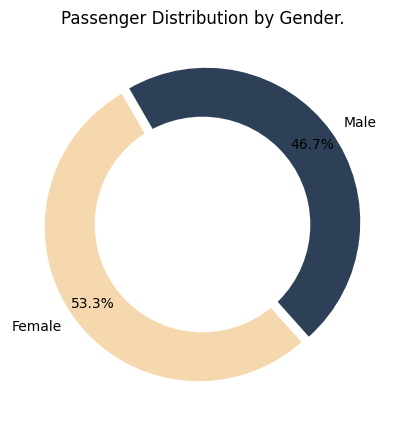

In [60]:
import matplotlib.pyplot as plt

categories = ['Female', 'Male']
values = df['payCardSex'].value_counts()
explode = (0.03, 0.03)

# Make the pie chart.
plt.figure(figsize=(8, 5))
plt.pie(values, labels=categories, autopct='%1.1f%%', startangle=120, colors=['#f6d8ae','#2e4057'], pctdistance=0.85, explode=explode)

# Draw circle.
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
 
# Adding Circle in Pie chart.
fig.gca().add_artist(centre_circle)

plt.title('Passenger Distribution by Gender.')
plt.show()


* **Berdasarkan Umur Penumpang**

In [64]:
def ageClasification(x):
    if x > 2011:
        return 'Anak-anak'
    elif 2011 >= x >= 1998:
        return 'Remaja'
    elif 1997 >= x >= 1978:
        return 'Dewasa'
    else:
        return 'Usia Lanjut'
    
df['ageClasification'] = df['payCardBirthDate'].apply(ageClasification)

In [65]:
birthdate = df['ageClasification'].value_counts().reset_index()
birthdate

,ageClasification,count
0,Dewasa,19747
1,Remaja,10061
2,Usia Lanjut,5891
3,Anak-anak,775


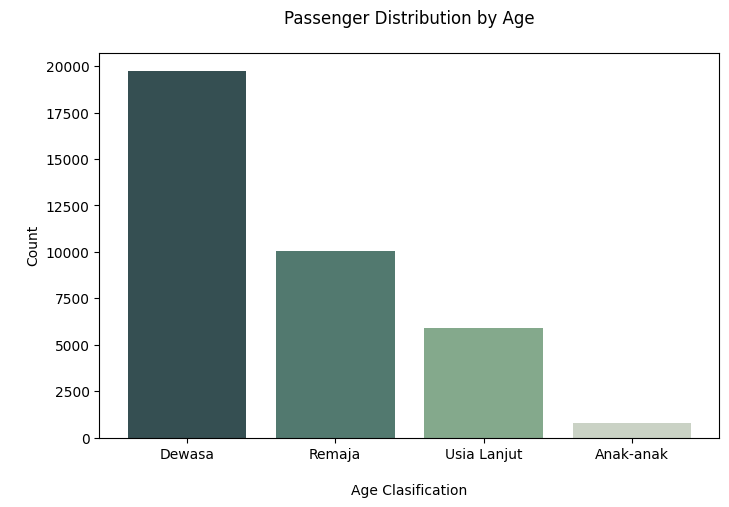

In [66]:
plt.figure(figsize=(8,5))

# create bar plot
plt.bar(birthdate['ageClasification'], birthdate['count'], color=['#354F52', '#52796F', '#84A98C', '#CAD2C5'])

plt.xlabel('\nAge Clasification', size=10)
plt.ylabel('\nCount', size=10)
plt.title('Passenger Distribution by Age\n', size=12)
plt.show()

* **Berdasarkan Paycard yang dipakai**

In [67]:
df['payCardBank'].value_counts()

payCardBank
dki       18015
emoney     6625
brizzi     3390
flazz      3101
online     2765
bni        2578
Name: count, dtype: int64

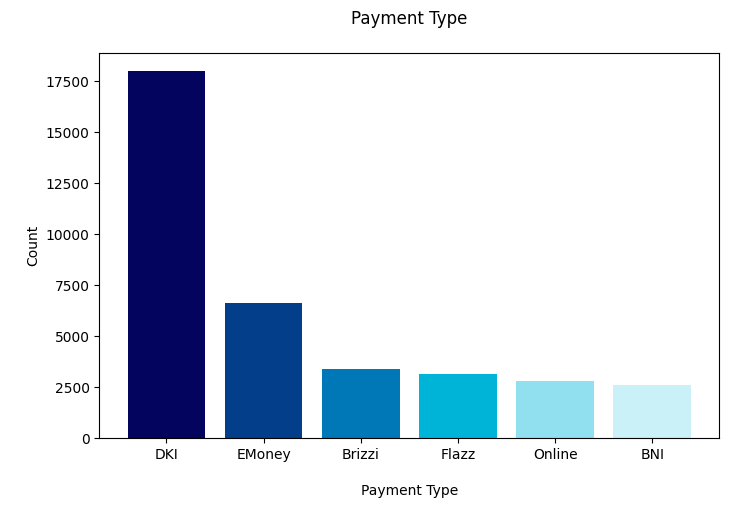

In [68]:
count = df['payCardBank'].value_counts()
plt.figure(figsize=(8,5))

# create bar plot
plt.bar(['DKI', 'EMoney', 'Brizzi', 'Flazz', 'Online', 'BNI'], count, color=['#03045E', '#023E8A', '#0077B6', '#00B4D8', '#90E0EF', '#CAF0F8'])

plt.xlabel('\nPayment Type', size=10)
plt.ylabel('\nCount', size=10)
plt.title('Payment Type\n', size=12)
plt.show()

In [69]:
user_by_age = df.groupby(['payCardBank', 'ageClasification'])['ageClasification'].count().reset_index(name='counts')
user_by_age

,payCardBank,ageClasification,counts
0,bni,Anak-anak,178
1,bni,Dewasa,1447
2,bni,Remaja,752
3,bni,Usia Lanjut,201
4,brizzi,Anak-anak,41
5,brizzi,Dewasa,2004
6,brizzi,Remaja,874
7,brizzi,Usia Lanjut,471
8,dki,Anak-anak,248
9,dki,Dewasa,9676


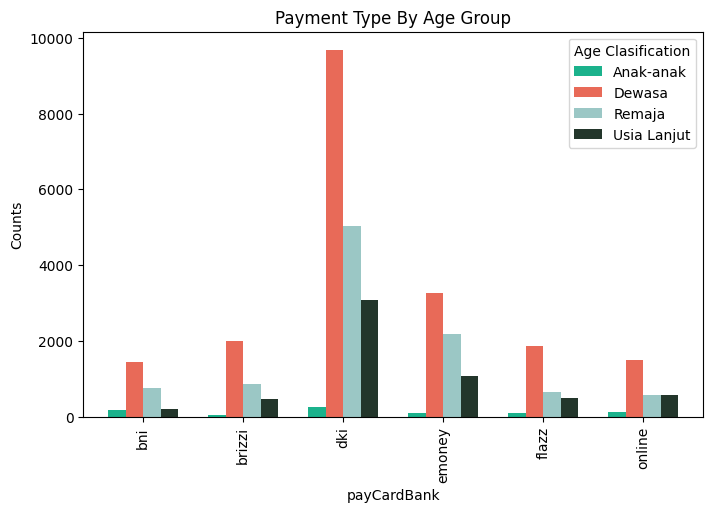

In [70]:
pivot_df = user_by_age.pivot(index='payCardBank', columns='ageClasification', values='counts')

ax = pivot_df.plot(kind='bar', color=['#1BB28C', '#E86A58', '#9BC7C5', '#23362B'], width=0.7, figsize=(8, 5))

ax.set_xlabel('payCardBank')
ax.set_ylabel('Counts')
ax.set_title('Payment Type By Age Group')

plt.legend(title='Age Clasification')
plt.show()


**Pendapatan Sebulan**

* Berdasarkan Tipe Payment

In [71]:
total_payAmount = df.groupby('payCardBank')['payAmount'].sum().reset_index()
total_payAmount

,payCardBank,payAmount
0,bni,6660500.0
1,brizzi,11879500.0
2,dki,44260000.0
3,emoney,19918000.0
4,flazz,8635000.0
5,online,6935500.0


In [72]:
total_payAmount.payAmount.sum()

np.float64(98288500.0)

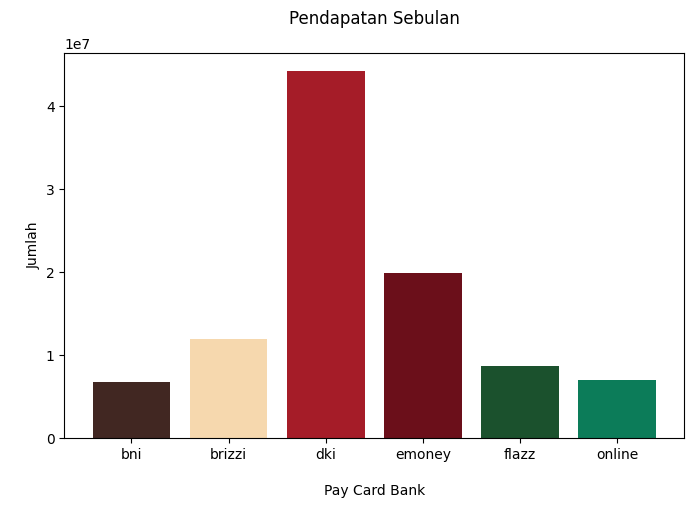

In [77]:
plt.figure(figsize=(8,5))

# create bar plot
plt.bar(total_payAmount['payCardBank'], total_payAmount['payAmount'], color=['#412722', '#F6D8AE', '#A51C28', '#6B0F1A', '#1B512D', '#0C7C59'])

plt.xlabel('\nPay Card Bank', size=10)
plt.ylabel('\nJumlah', size=10)
plt.title('Pendapatan Sebulan\n', size=12)
plt.show()

* Berdasarkan Umur

In [79]:
amount_age = df.groupby('ageClasification').payAmount.sum().reset_index()
amount_age

,ageClasification,payAmount
0,Anak-anak,3303500.0
1,Dewasa,56214500.0
2,Remaja,26821500.0
3,Usia Lanjut,11949000.0


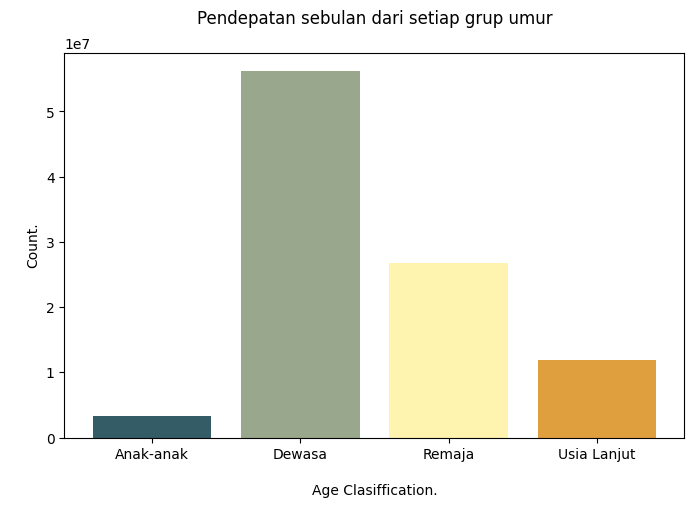

In [80]:
plt.figure(figsize=(8,5))

# create bar plot
plt.bar(amount_age['ageClasification'], amount_age['payAmount'], color=['#335c67', '#99a88c', '#fff3b0', '#e09f3e'])

plt.xlabel('\nAge Clasiffication.', size=10)
plt.ylabel('\nCount.', size=10)
plt.title('Pendepatan sebulan dari setiap grup umur\n', size=12)
plt.show()

* Pendapatan per hari dalam satu bulan

In [81]:
# membuat kolom baru untuk hari (date)
df['Date'] = df['tapInTime'].dt.date
df

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,ageClasification,Date
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,Pal Putih,-6.184631,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0,Remaja,2023-04-03
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,Kemenkes 2,-6.228700,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0,Dewasa,2023-04-03
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,Gg. Kunir II,-6.133132,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0,Dewasa,2023-04-03
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,Taman Elok 1,-6.195743,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0,Dewasa,2023-04-03
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,Sunter Boulevard Barat,-6.149650,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0,Dewasa,2023-04-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,Tosari,-6.196892,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0,Remaja,2023-04-21
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,Garuda Taman Mini,-6.290154,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0,Usia Lanjut,2023-04-18
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,Plaza Sentral,-6.216247,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0,Usia Lanjut,2023-04-04
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,Museum Textile,-6.188656,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0,Usia Lanjut,2023-04-15


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36474 entries, 0 to 37899
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transID           36474 non-null  object        
 1   payCardID         36474 non-null  int64         
 2   payCardBank       36474 non-null  object        
 3   payCardName       36474 non-null  object        
 4   payCardSex        36474 non-null  object        
 5   payCardBirthDate  36474 non-null  int64         
 6   corridorID        36474 non-null  object        
 7   corridorName      36474 non-null  object        
 8   direction         36474 non-null  float64       
 9   tapInStops        36474 non-null  object        
 10  tapInStopsName    36474 non-null  object        
 11  tapInStopsLat     36474 non-null  float64       
 12  tapInStopsLon     36474 non-null  float64       
 13  stopStartSeq      36474 non-null  int64         
 14  tapInTime         36474 non

In [83]:
# mengubah tipe data "Date" menjadi datetime
df['Date'] = pd.to_datetime(df['Date'])

# Membuat kolom baru "Day".
df['Day'] = df['Date'].dt.day_name()
df

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,ageClasification,Date,Day
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,Pal Putih,-6.184631,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0,Remaja,2023-04-03,Monday
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,Kemenkes 2,-6.228700,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0,Dewasa,2023-04-03,Monday
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,Gg. Kunir II,-6.133132,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0,Dewasa,2023-04-03,Monday
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,Taman Elok 1,-6.195743,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0,Dewasa,2023-04-03,Monday
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,Sunter Boulevard Barat,-6.149650,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0,Dewasa,2023-04-03,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,Tosari,-6.196892,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0,Remaja,2023-04-21,Friday
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,Garuda Taman Mini,-6.290154,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0,Usia Lanjut,2023-04-18,Tuesday
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,Plaza Sentral,-6.216247,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0,Usia Lanjut,2023-04-04,Tuesday
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,Museum Textile,-6.188656,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0,Usia Lanjut,2023-04-15,Saturday


In [84]:
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

revenue_day = df.groupby('Day').payAmount.sum().reindex(days_order).reset_index()
revenue_day

,Day,payAmount
0,Monday,17882000.0
1,Tuesday,17845500.0
2,Wednesday,17788500.0
3,Thursday,17792000.0
4,Friday,18024500.0
5,Saturday,4416500.0
6,Sunday,4539500.0


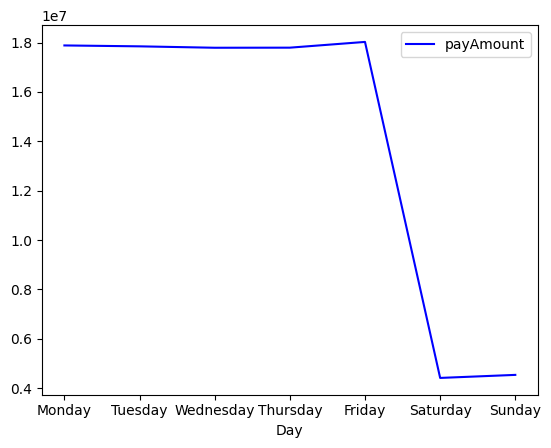

In [85]:
ax = plt.gca()

revenue_day.plot(kind='line',x='Day',y='payAmount', color='blue', ax=ax)

plt.show()

**Trafik Transaksi**

* Koridor atau rute yang memiliki penumpang terbanyak

In [87]:
koridor_10 = df['corridorName'].value_counts().head(10).reset_index()
koridor_10

,corridorName,count
0,Cibubur - Balai Kota,394
1,Ciputat - CSW,383
2,Harmoni - Jakarta International Stadium,343
3,Kalideres - Bundaran HI via Veteran,341
4,Pulo Gadung - Monas,339
5,Kampung Rambutan - Pondok Gede,335
6,Rusun Pondok Bambu - Walikota Jakarta Timur,332
7,Kebayoran Lama - Tanah Abang,330
8,Rusun Rawa Bebek - Kodamar,317
9,Pasar Minggu - Tanah Abang,308


In [98]:
koridor_10.columns = ['corridorName', 'Counts']
koridor_10

,corridorName,Counts
0,Cibubur - Balai Kota,394
1,Ciputat - CSW,383
2,Harmoni - Jakarta International Stadium,343
3,Kalideres - Bundaran HI via Veteran,341
4,Pulo Gadung - Monas,339
5,Kampung Rambutan - Pondok Gede,335
6,Rusun Pondok Bambu - Walikota Jakarta Timur,332
7,Kebayoran Lama - Tanah Abang,330
8,Rusun Rawa Bebek - Kodamar,317
9,Pasar Minggu - Tanah Abang,308


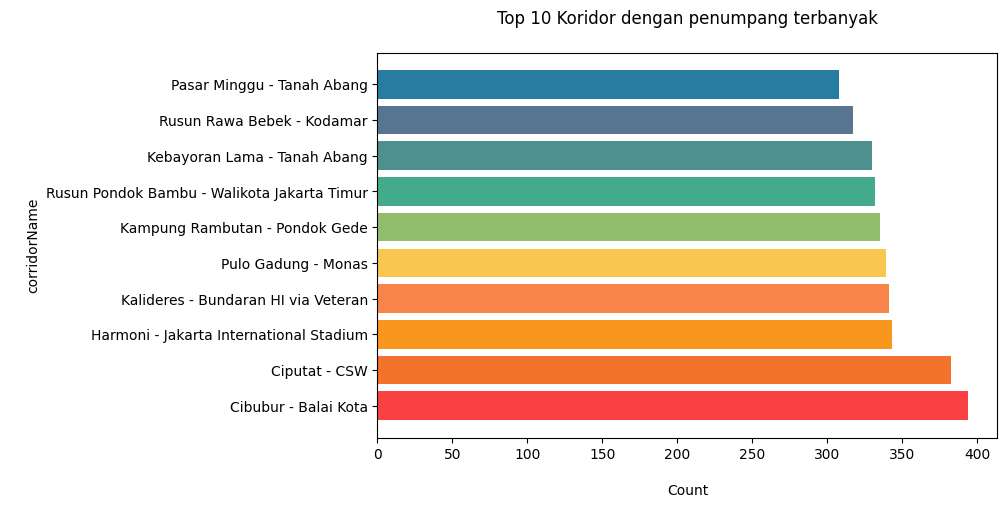

In [99]:
plt.figure(figsize=(8,5))

# membuat bar plot
plt.barh(koridor_10['corridorName'], koridor_10['Counts'], color=['#F94144', '#F3722C', '#F8961E', '#F9844A', '#F9C74F', '#90BE6D', '#43AA8B','#4D908E', '#577590', '#277DA1'])

plt.xlabel('\nCount', size=10)
plt.ylabel('\ncorridorName', size=10)
plt.title('Top 10 Koridor dengan penumpang terbanyak\n', size=12)
plt.show()

* Koridor yang sering digunakan perempuan 

In [94]:
#Koridor yang sering digunakan perempuan 
female_corr = df[(df['payCardSex'] == "F")]
female_corr_5 = female_corr['corridorName'].value_counts().reset_index().head(5)
female_corr_5

,corridorName,count
0,Pasar Minggu - Tanah Abang,224
1,Rusun Rawa Bebek - Kodamar,217
2,Poris Plawad - Bundaran Senayan,216
3,Cilangkap - Cililitan,200
4,Terminal Tanah Merah - Pulo Gadung,199


In [96]:
female_corr_5.columns = ['corridorName', 'Counts']
female_corr_5

,corridorName,Counts
0,Pasar Minggu - Tanah Abang,224
1,Rusun Rawa Bebek - Kodamar,217
2,Poris Plawad - Bundaran Senayan,216
3,Cilangkap - Cililitan,200
4,Terminal Tanah Merah - Pulo Gadung,199


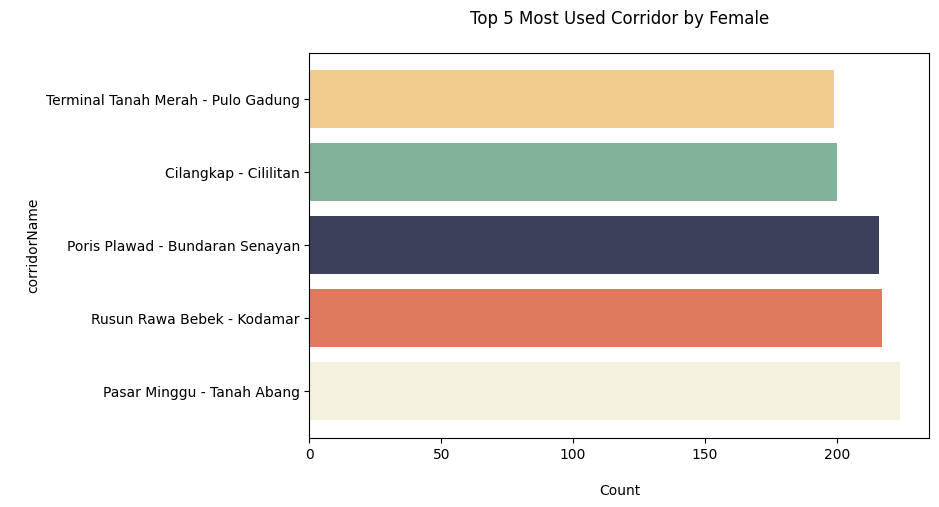

In [97]:
plt.figure(figsize=(8,5))

# membuat bar plot
plt.barh(female_corr_5['corridorName'], female_corr_5['Counts'], color=['#f4f1de', '#e07a5f', '#3d405b', '#81b29a', '#f2cc8f'])

plt.xlabel('\nCount', size=10)
plt.ylabel('\ncorridorName', size=10)
plt.title('Top 5 Most Used Corridor by Female\n', size=12)
plt.show()

* Halte dengan penumpang terbanyak

Berdasarkan `TapInStops`

In [100]:
halte_in = df.tapInStopsName.value_counts().reset_index().head()
halte_in

,tapInStopsName,count
0,Penjaringan,235
1,Garuda Taman Mini,203
2,BKN,163
3,BNN LRT,150
4,Pejaten,146


In [101]:
halte_in.columns = ['tapInStopsName', 'Counts']
halte_in

,tapInStopsName,Counts
0,Penjaringan,235
1,Garuda Taman Mini,203
2,BKN,163
3,BNN LRT,150
4,Pejaten,146


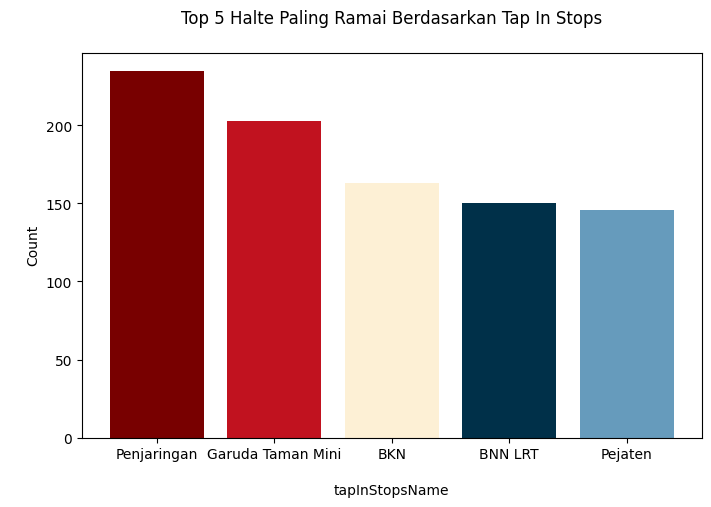

In [105]:
plt.figure(figsize=(8,5))

# create bar plot
plt.bar(halte_in['tapInStopsName'], halte_in['Counts'], color=['#780000', '#c1121f', '#fdf0d5', '#003049', '#669bbc'])

plt.xlabel('\ntapInStopsName', size=10)
plt.ylabel('\nCount', size=10)
plt.title('Top 5 Halte Paling Ramai Berdasarkan Tap In Stops\n', size=12)
plt.show()

Berdasarkan `TapOutStops`

In [103]:
halte_out = df.tapOutStopsName.value_counts().reset_index().head()
halte_out

,tapOutStopsName,count
0,BKN,316
1,Penjaringan,265
2,Term. Senen,196
3,Monas,167
4,Term. Kampung Rambutan,164


In [104]:
halte_out.columns = ['tapOutStopsName', 'Counts']
halte_out

,tapOutStopsName,Counts
0,BKN,316
1,Penjaringan,265
2,Term. Senen,196
3,Monas,167
4,Term. Kampung Rambutan,164


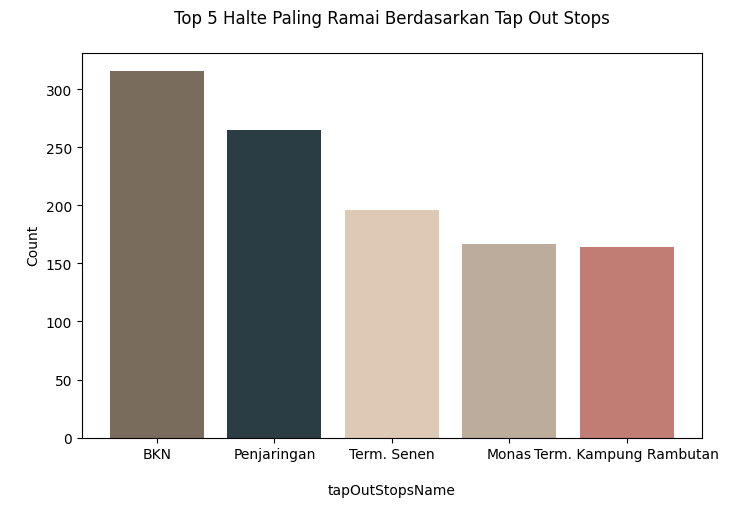

In [106]:
plt.figure(figsize=(8,5))

# create bar plot
plt.bar(halte_out['tapOutStopsName'], halte_out['Counts'], color=['#7a6c5d', '#2a3d45', '#ddc9b4', '#bcac9b', '#c17c74'])

plt.xlabel('\ntapOutStopsName', size=10)
plt.ylabel('\nCount', size=10)
plt.title('Top 5 Halte Paling Ramai Berdasarkan Tap Out Stops\n', size=12)
plt.show()

**Rush Hour**

In [107]:
# Membuat kolom baru jam

df['tapInHour'] = df['tapInTime'].dt.hour
df

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,ageClasification,Date,Day,tapInHour
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,Pal Putih,-6.184631,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0,Remaja,2023-04-03,Monday,5
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,Kemenkes 2,-6.228700,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0,Dewasa,2023-04-03,Monday,5
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,Gg. Kunir II,-6.133132,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0,Dewasa,2023-04-03,Monday,5
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,Taman Elok 1,-6.195743,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0,Dewasa,2023-04-03,Monday,5
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,Sunter Boulevard Barat,-6.149650,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0,Dewasa,2023-04-03,Monday,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,Tosari,-6.196892,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0,Remaja,2023-04-21,Friday,18
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,Garuda Taman Mini,-6.290154,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0,Usia Lanjut,2023-04-18,Tuesday,21
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,Plaza Sentral,-6.216247,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0,Usia Lanjut,2023-04-04,Tuesday,10
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,Museum Textile,-6.188656,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0,Usia Lanjut,2023-04-15,Saturday,19


In [110]:
Hari = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

rush_hour = pd.crosstab(df['Day'], df['tapInHour']).reindex(Hari)
rush_hour

tapInHour,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
Day,,,,,,,,,,,,,,,,,
Monday,600,1107,524,502,489,14,26,16,35,1,26,600,1008,419,441,430,366
Tuesday,591,1092,525,494,496,16,26,28,20,2,28,593,1014,416,415,440,395
Wednesday,592,1077,478,514,517,28,26,31,17,1,31,611,1017,429,435,389,381
Thursday,621,1070,485,512,503,20,27,21,26,3,37,598,986,451,406,409,399
Friday,619,1084,483,527,513,23,29,23,26,1,34,621,1002,413,441,428,378
Saturday,110,91,91,116,103,88,91,109,99,79,116,111,138,106,109,103,75
Sunday,101,98,107,114,93,98,102,99,115,80,114,101,116,98,117,127,71


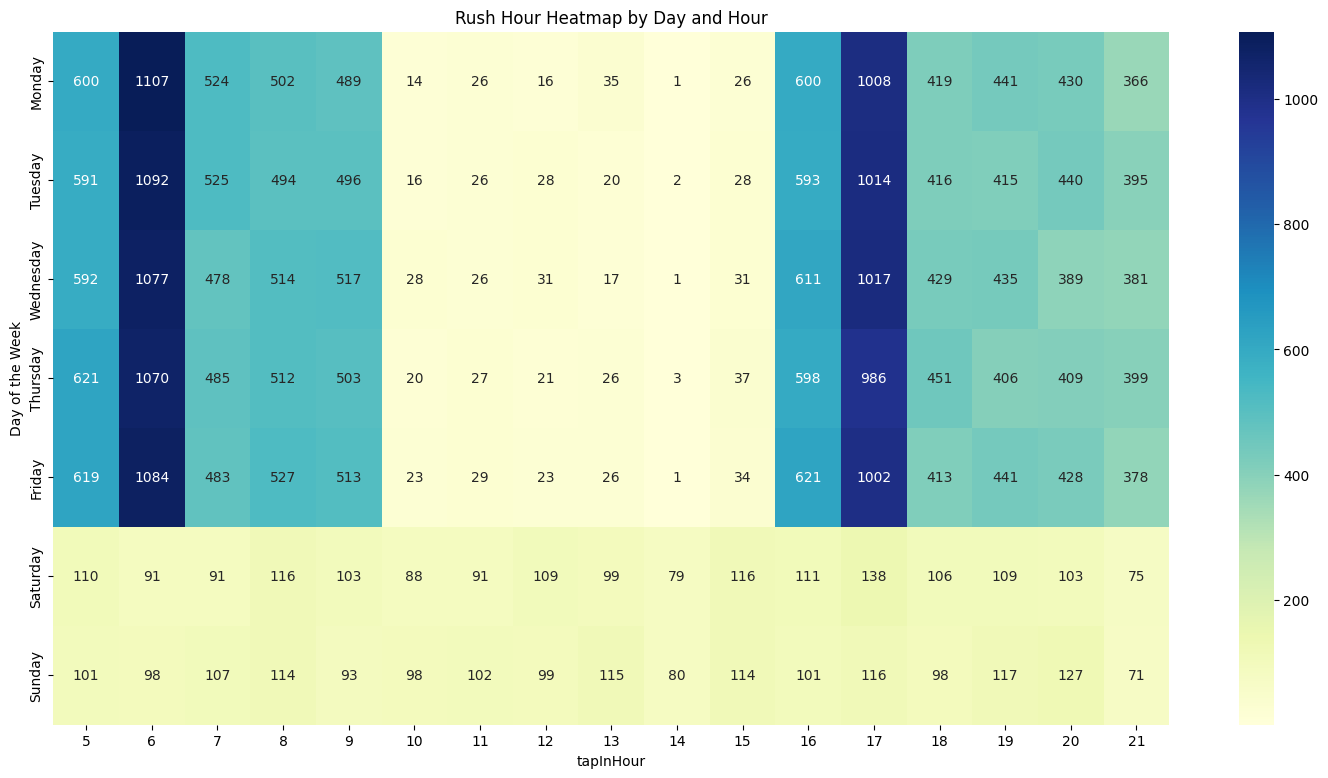

In [111]:
plt.figure(figsize=(18, 9))
sns.heatmap(rush_hour, annot=True, annot_kws={'size':10}, fmt='d', cmap='YlGnBu', xticklabels=True)
plt.title('Rush Hour Heatmap by Day and Hour')
plt.xlabel('tapInHour')
plt.ylabel('Day of the Week')
plt.show()

# **Kesimpulan**

**Distribusi Penumpang**

- Penumpang perempuan 6.6% lebih banyak dari laki-laki.

- Kelompok usia terbesar penumpang Transjakarta adalah dewasa (0.54%) dengan rentang usia 26-45 tahun, diikuti remaja, lansia, dan anak-anak.

- Sebagian besar pengguna Transjakarta adalah pekerja, mahasiswa, dan pelajar.

- Kartu DKI adalah kartu favorit penumpang Transjakarta untuk pembayaran, dengan total 18.015 transaksi selama satu bulan. Ada jenis pembayaran "online" yang menempati peringkat ke-5, yang dilakukan melalui aplikasi "Tije".

- Karena kelompok usia dewasa sebagai penumpang terbanyak Transjakarta, mereka menduduki peringkat pertama dalam setiap jenis pembayaran.

**Pendapatan**

- Dalam satu bulan di April 2023, pendapatan Transjakarta mencapai 98.288.500 rupiah dan kartu DKI adalah penyumbang terbesar dengan total pendapatan 44.260.000 rupiah atau setara dengan 0,45%.

- Dilihat dari hari, Senin hingga Jumat memiliki nilai pendapatan total yang tidak begitu berbeda, sedangkan pada Sabtu dan Minggu, terdapat perbedaan yang cukup besar. Hal ini bisa disebabkan karena banyak penumpang bekerja, sekolah, atau melakukan aktivitas mereka selama hari kerja dan Jumat adalah hari dengan nilai pendapatan total tertinggi, yaitu 18.024.500 rupiah atau setara dengan 0,18%.


**Trafik Transaksi**

- Secara umum, rute yang ramai penumpang adalah Cibubur - Balai Kota, Ciputat - CSW, Harmoni - Jakarta International Stadium, Kalideres - Bundaran HI via Veteran, Pulo Gadung - Monas, Kampung Rambutan - Pondok Gede, Rusun Pondok Bambu - Walikota Jakarta Timur, Kebayoran Lama - Tanah Abang, Rusun Rawa Bebek - Kodamar dan Pasar Minggu - Tanah Abang, dengan 308 hingga 394 penumpang per koridor per bulan.

- Penumpang perempuan lebih sering naik rute Pasar Minggu - Tanah Abang, Rusun Rawa Bebek - Kodamar, Poris Plawad - Bundaran Senayan, Cilangkap - Cililitan dan Terminal Tanah Merah - Pulo Gadung, dengan 199 hingga 224 penumpang perempuan per koridor selama sebulan.

- Setelah membahas rute, kita akan membahas halte. Halte tersibuk berdasarkan tapInStops (titik naik penumpang) adalah Penjaringan, Garuda Taman Mini, BKN, BNN LRT, dan Pejaten, dengan 146 hingga 235 penumpang per halte. Sementara berdasarkan tapOutStops (titik turun penumpang) adalah BKN, Penjaringan, Terminal Pasar Senen, Monas, dan Terminal Kampung Rambutan, dengan 164 hingga 316 penumpang per halte per bulan. Banyak calon penumpang naik dari Jakarta Timur, Utara, dan Selatan, sementara banyak yang menyelesaikan perjalanan di Jakarta Pusat dan Selatan, di mana terdapat banyak kantor.

- Selanjutnya, jam sibuk ditampilkan melalui heat map. Jam sibuk dibagi menjadi dua, pagi dan sore. Jam sibuk pagi terjadi pada pukul 5 pagi hingga 9 pagi karena orang mulai berangkat ke aktivitas masing-masing, sementara jam sibuk sore terjadi pada pukul 4 sore hingga 5 sore karena pada saat itu orang sudah dalam perjalanan pulang. Dalam satu hari, puncak jam sibuk terjadi pada pukul 6 pagi, lalu dari pukul 10 pagi hingga 3 sore, jumlah penumpang menurun, yang berarti tidak ada kemacetan saat itu. Hal lain adalah bahwa jam sibuk ini hanya terjadi pada hari Senin hingga Jumat, yang merupakan hari kerja, dan pada akhir pekan orang cenderung tidak menggunakan Transjakarta sehingga jumlah penumpang tidak padat.



# **Rekomendasi Data Analyst**

- Jumlah penumpang perempuan yang lebih banyak menunjukkan masih banyak perempuan yang mempercayai Transjakarta sebagai moda transportasi mereka, sehingga keselamatan mereka harus dijaga. Bus Pink adalah salah satu solusi yang diluncurkan Transjakarta sejak 2016, tetapi masih banyak rute yang tidak memiliki Bus Pink termasuk rute yang sering digunakan oleh perempuan. Selain itu, keberadaan CCTV dan petugas di dalam bus bisa menjadi upaya untuk meminimalkan kekerasan seksual.Pencopetan juga bisa terjadi di bus. Solusi: Perbanyak armada Bus Pink, Pemasangan CCTV dan menghadirkan petugas di bus.

- Seperti yang diketahui, pada waktu-waktu tertentu ada lonjakan jumlah penumpang, ini memicu penumpukan penumpang, apalagi masih banyak halte yang hanya memiliki satu pintu untuk setiap tap in dan tap out. Dampak dari penumpukan ini adalah calon penumpang harus mengantri panjang dan memakan waktu lebih lama. Disarankan untuk menambah pintu, terutama di halte yang ramai.

- Penumpang harus berdesakan selama jam sibuk, dan kondisi yang tidak nyaman ini bisa dimanfaatkan oleh pelaku kejahatan. Hal lain yang bisa dilakukan adalah membatasi jumlah penumpang di dalam bus, misalnya satu bus diisi 30 orang dan menambah jumlah armada sehingga calon penumpang tidak menunggu lama di halte.

- Transportasi umum seperti Transjakarta harus menjaga kenyamanan penumpangnya, dengan jam operasional yang tinggi, performa bus juga bisa menurun. Untuk menghindari hal ini, pengecekan rutin bisa dilakukan agar kejadian seperti mogok tidak terjadi.

- Selain menggunakan kartu, pembayaran Transjakarta juga bisa dilakukan secara online atau melalui aplikasi "Tije". Berdasarkan analisis, pengguna online masih sedikit, termasuk kelompok usia dewasa dan remaja. Penumpang dengan kelompok usia ini bisa dikatakan melek digital, sehingga Transjakarta bisa memanfaatkan ini untuk meningkatkan penggunaan aplikasi. Solusi untuk ini bisa dengan mempromosikan penggunaan aplikasi "Tije" dengan memberi reward, seperti perjalanan gratis untuk pengguna aktif.

# **Export Dataset Baru**


In [112]:
df

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,ageClasification,Date,Day,tapInHour
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,Pal Putih,-6.184631,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0,Remaja,2023-04-03,Monday,5
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,Kemenkes 2,-6.228700,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0,Dewasa,2023-04-03,Monday,5
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,Gg. Kunir II,-6.133132,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0,Dewasa,2023-04-03,Monday,5
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,Taman Elok 1,-6.195743,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0,Dewasa,2023-04-03,Monday,5
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,Sunter Boulevard Barat,-6.149650,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0,Dewasa,2023-04-03,Monday,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,Tosari,-6.196892,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0,Remaja,2023-04-21,Friday,18
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,Garuda Taman Mini,-6.290154,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0,Usia Lanjut,2023-04-18,Tuesday,21
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,Plaza Sentral,-6.216247,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0,Usia Lanjut,2023-04-04,Tuesday,10
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,Museum Textile,-6.188656,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0,Usia Lanjut,2023-04-15,Saturday,19


In [114]:
df.to_csv('TransjakartaCleaned.csv', index=False)

# **Link Tableau**